C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10612\421946670.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Blues')


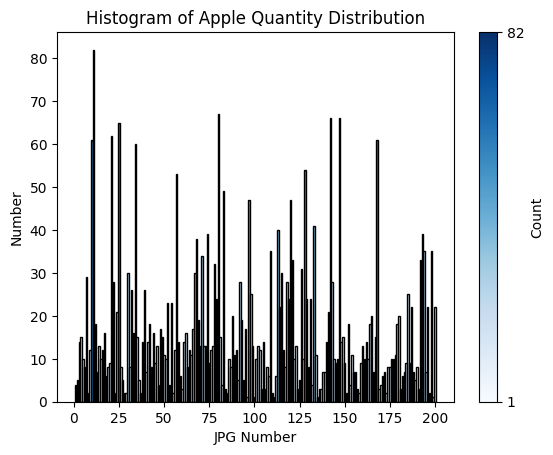

In [1]:
import os
import re
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split('([0-9]+)', s)]

def count_lines_in_txt_files(directory):
    # 获取目录中所有文件，并按照自然顺序排序
    files = sorted([f for f in os.listdir(directory) if f.endswith('.txt')], key=natural_sort_key)

    # 存储每个文件的行数
    line_counts = []

    # 遍历每个文件并统计行数
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                line_count = sum(1 for line in file)
                line_counts.append(line_count)
                # print(f"{file_name}: {line_count} 行")
        except Exception as e:
            print(f"无法读取文件 {file_name}: {e}")

    return line_counts

def plot_histogram(line_counts):
    # 使用颜色映射，个数越多颜色越深
    norm = Normalize(vmin=min(line_counts), vmax=max(line_counts))
    cmap = get_cmap('Blues')

    fig, ax = plt.subplots()
    bars = ax.bar(range(1, len(line_counts) + 1), line_counts, color=cmap(norm(line_counts)), edgecolor='black')
    plt.title('Histogram of Apple Quantity Distribution')
    plt.xlabel('JPG Number')
    plt.ylabel('Number')

    # 添加颜色条
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(line_counts)
    cbar = plt.colorbar(mappable, ax=ax, label='Count')
    cbar.set_ticks([min(line_counts), max(line_counts)])
    plt.savefig('Question1.png',dpi=1200)
    plt.show()

if __name__ == "__main__":
    # 指定目录路径
    target_directory = './yolov5-master/runs/detect/exp2/labels/'

    # 调用函数统计行数
    line_counts = count_lines_in_txt_files(target_directory)

    # 绘制直方图
    plot_histogram(line_counts)
